# Yearly variation

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib import cm
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import scipy 

In [263]:
subject_loc = 'AHMEDABAD'
subject_para= 'Rainfall'
startdate='1970-01'
enddate='2002-12'


df_= pd.read_csv('district_files/'+subject_loc+".csv")
df_ = df_.drop(['Unnamed: 0', 'Id','name'], axis=1)
df_[df_['year'] < 1900] = np.NaN
df_ = df_.mask(df_ < 0) #whereever in dataframe <0 put nan
df_ = df_.dropna()
df_

df_=df_.drop(['total', 'JF', 'MAM', 'JJAS', 'OND'], axis = 1)
dff = df_.set_index('year').stack().reset_index(name='Monthly_rain') #make everything in one column
dff=dff.rename(columns={"level_1": "months"})
dff['year'] = dff['year'].astype(int)
dff['date'] = pd.to_datetime(dff['year'].astype(str)  + dff['months'] , format='%Y%b')

In [264]:
#data=dff

In [265]:
#data

In [266]:
# df                 = data[(data.date >= str(startdate)) & (data.date <=  str(enddate))]
# df
# fig=plt.figure(figsize=[30,18])  
# plt.plot(df['date'], df['Monthly_rain'],marker='o')
# plt.xlabel('Years',fontsize=45,fontstyle='italic',fontweight='bold',labelpad=45,color='black')
# plt.xticks(fontsize=35, rotation=90)
# plt.ylabel('Rain(mm)',fontsize=45,fontstyle='italic',fontweight='bold',labelpad=45,color='black')
# plt.yticks(fontsize=35, rotation=0)
# plt.title('Yearly variation of'+' '+subject_para+' ' + 'over' +' '+subject_loc+' '+ 'during'+' '+startdate+' '+'to'+' '+enddate+' ',fontsize=50,color='black',fontstyle='italic',fontname="sans-serif",fontweight='bold', pad=60)



# y=df['Monthly_rain']
# x=df['year']
# ymax = max(y)
# ymax1 = round(max(y),2)
# xpos= x.iloc[list(y).index(ymax)]

# text1= "Date={:}, (Highest)Value={:}".format(xpos, ymax1)
# plt.plot(xpos,ymax,color='red',marker='*',ms=40, label=text1)
# plt.legend(prop={"size":30})

# ymin = min(y)
# ymin1 = round(min(y),2)
# xminpos = x.iloc[list(y).index(ymin)] 
# text2= "Date={:}, (Lowest) Value={:}".format(xminpos, ymin1)
# plt.plot(xminpos,ymin,color='blue',marker='*',ms=40, label=text2)
# plt.legend(prop={"size":30})




In [267]:
def plot_m(df,unit,param,color='red'):
    fig=plt.figure(figsize=[30,18])  
    plt.plot(df['date'], df['Monthly_rain'],marker='o')
    plt.xlabel('Years',fontsize=45,fontstyle='italic',fontweight='bold',labelpad=45,color='black')
    plt.xticks(fontsize=35, rotation=90)
    plt.ylabel('Rain(mm)',fontsize=45,fontstyle='italic',fontweight='bold',labelpad=45,color='black')
    plt.yticks(fontsize=35, rotation=0)
    plt.title('Yearly variation of'+' '+subject_para+' ' + 'over' +' '+subject_loc+' '+ 'during'+' '+startdate+' '+'to'+' '+enddate+' ',fontsize=50,color='black',fontstyle='italic',fontname="sans-serif",fontweight='bold', pad=60)

    
    
    
    
    y=df[param]
    x=df['year']
    ymax = max(y)
    ymax1 = round(max(y),2)
    xpos= x.iloc[list(y).index(ymax)] 
    text1= "Date={:}, (Highest)Value={:}".format(xpos, ymax1)
    plt.plot(xpos,ymax,color='red',marker='*',ms=40, label=text1)
    plt.legend(prop={"size":30})
    
#     plt.plot(np.datetime64(xpos),ymax,color='red',marker='*',ms=40, label=text1)
#     plt.legend(prop={"size":30})

    ymin = min(y)
    ymin1 = round(min(y),2)
    xminpos = x.iloc[list(y).index(ymin)] 
    text2= "Date={:}, (Lowest) Value={:}".format(xminpos, ymin1)
    plt.plot(xminpos,ymin,color='blue',marker='*',ms=40, label=text2)
    plt.legend(prop={"size":30})
#     plt.text(np.datetime64(xminpos),ymin-3,text2, fontsize=20,color="red", bbox={'facecolor': 'turquoise', 'alpha': 0.9, 'pad': 5})
#     plt.plot(np.datetime64(xminpos),ymin,color='blue',marker='*',ms=40, label=text2)
#     plt.legend(prop={"size":30})


    plt.savefig('figure.png',format='png')

    
    ############################# this section calculates statistical table ##################
    import statistics 
    meanvalue=np.nanmean(y)
    medianvalue=np.nanmedian(y)
    stdevvalue=np.nanstd(y)

    from prettytable import PrettyTable

    l = [["Mean",meanvalue ], ["Median", medianvalue], ["Standard Deviation", stdevvalue], ["Highest Value", ymax], ["Date(Highest Value)", xpos],["Lowest Value", ymin], ["Date(Lowest Value)", xminpos]]

    table = PrettyTable(['Statistics', 'Value'])

    for rec in l:
        table.add_row(rec)

    print(table)


In [268]:
def monlyvar(data,subject_para, startdate='1990-01', enddate='2002-12'):
    df                 = data[(data.date >= str(startdate)) & (data.date <=  str(enddate))]
    
    if (subject_para=='Rainfall'):
        plot_m(df,unit= 'Rainfall (mm)',param='Monthly_rain',color='#006767')

+---------------------+--------------------+
|      Statistics     |       Value        |
+---------------------+--------------------+
|         Mean        | 59.17070707070707  |
|        Median       |        0.55        |
|  Standard Deviation | 113.25921061171555 |
|    Highest Value    |       636.0        |
| Date(Highest Value) |        1990        |
|     Lowest Value    |        0.0         |
|  Date(Lowest Value) |        1970        |
+---------------------+--------------------+


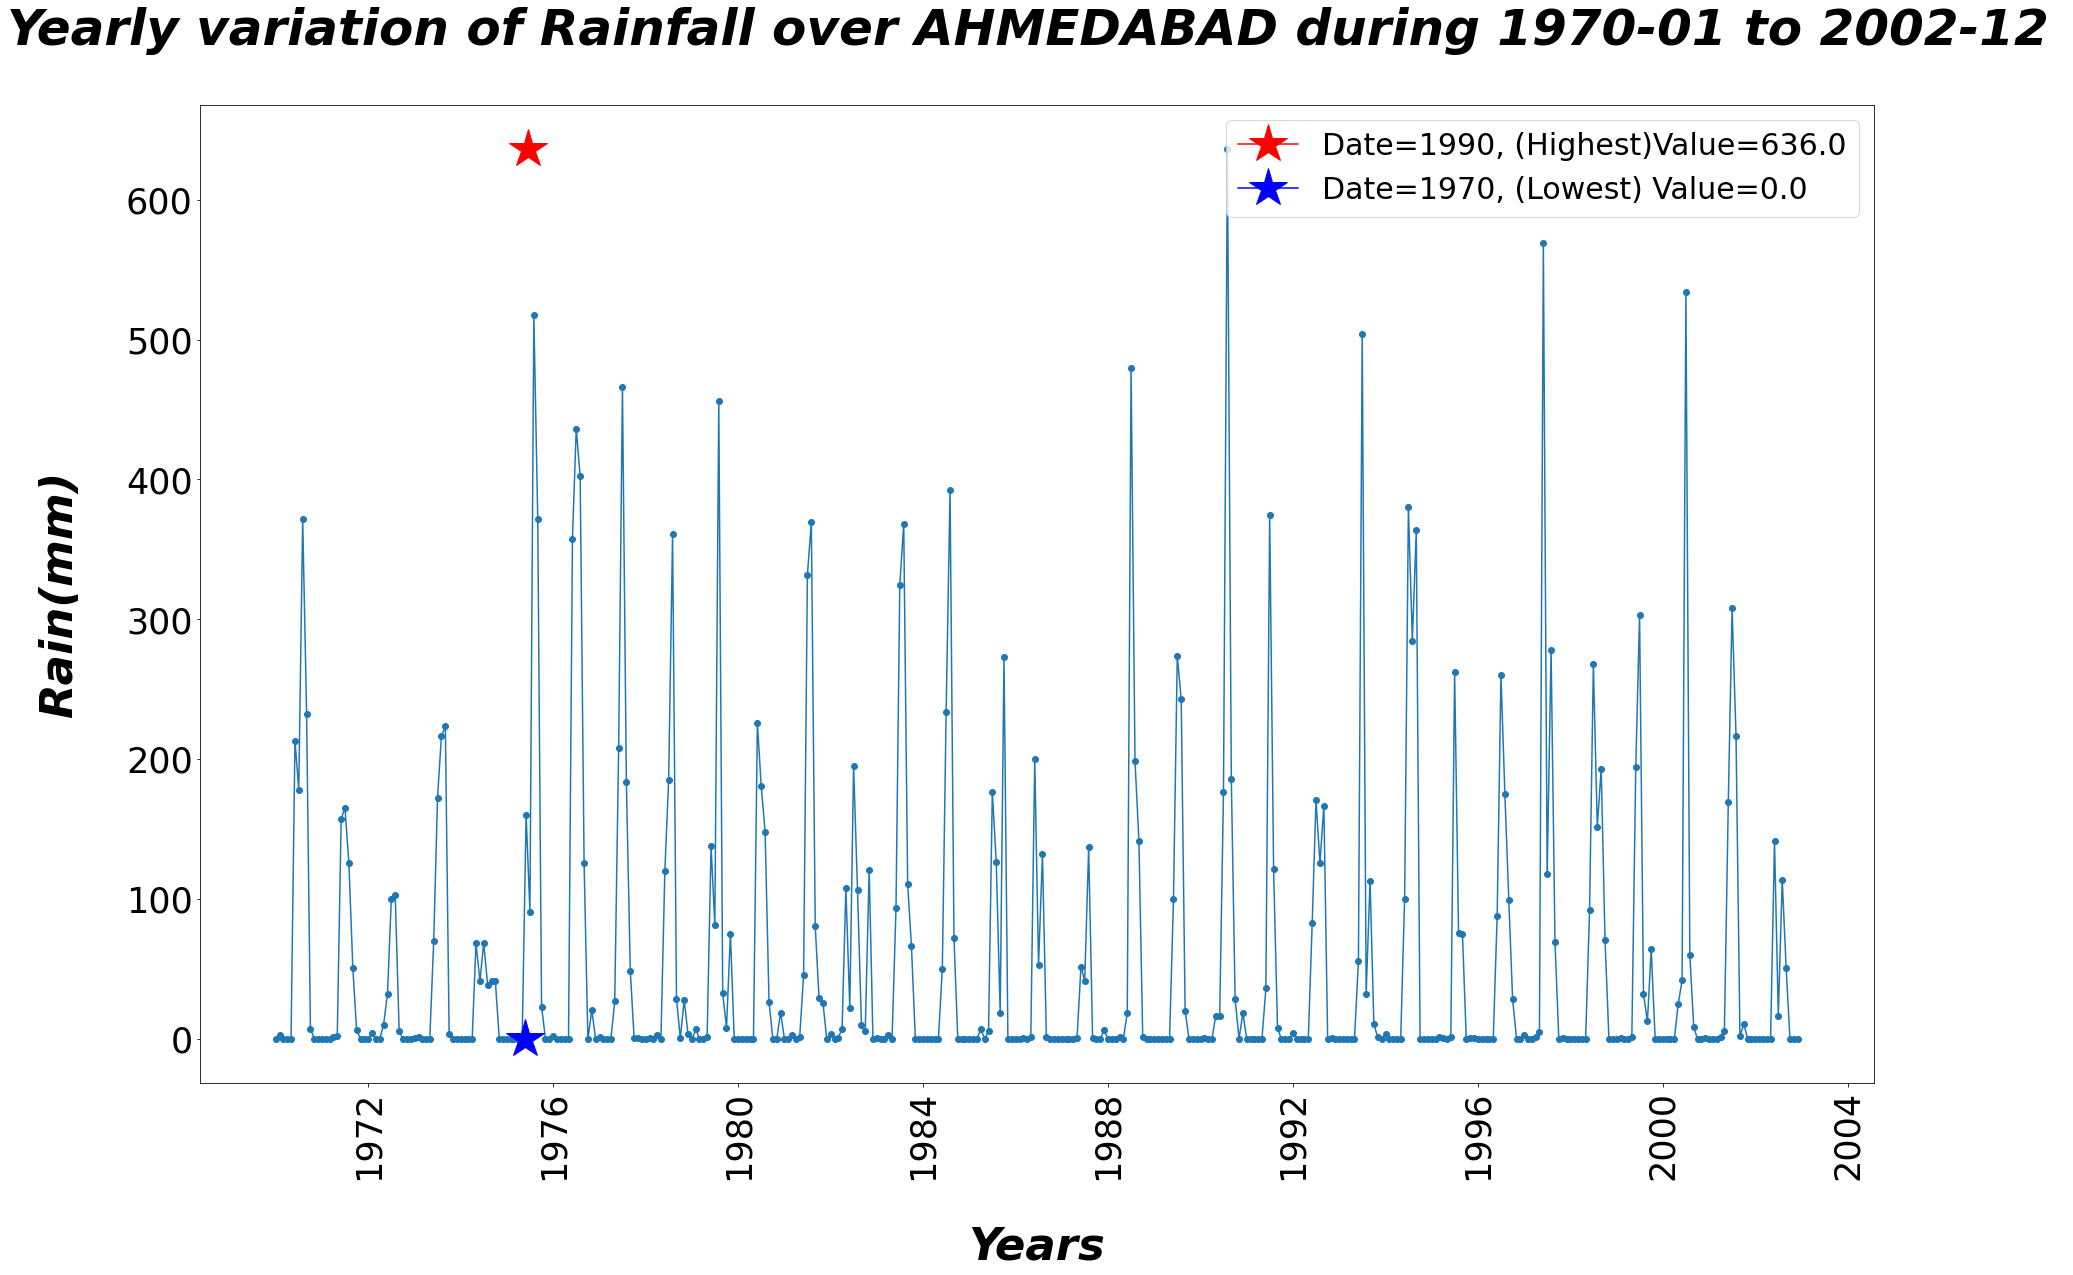

In [269]:
monlyvar(dff,subject_para,startdate,enddate)

<AxesSubplot:xlabel='year'>

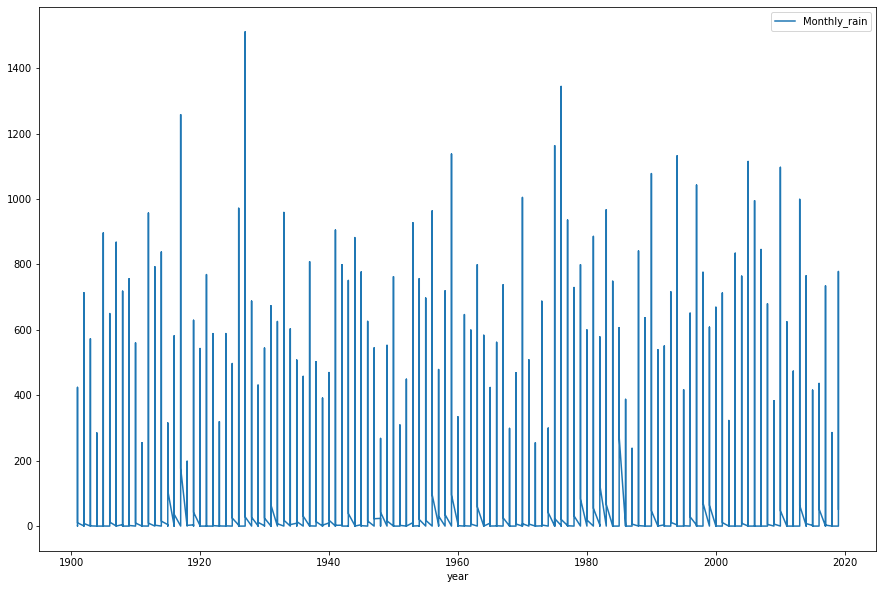

In [8]:
df.plot(x="year",kind='line',figsize=(15, 10))

# This is a line by line trial section